# Content

Take the results from MCMC fitting each light curve's rotation period, and propagate the errors. Check if the errors are highly assymetric or not.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
CWD = "/".join(os.getcwd().split("/")[:-2])

In [2]:
df = pd.read_csv(f"{CWD}/analysis/results/mcmc/rotation/mcmc_rotation_output.csv")

df.T

,0,1,2,3,4,5,6
ID,44984200,44984200,44984200,237880881,237880881,277539431,452922110
Prot_d_16,0.112971,0.112964,0.112978,0.351648,0.35128,0.189996,0.17638
Prot_d_50,0.112988,0.112973,0.112984,0.351673,0.351306,0.190013,0.176417
Prot_d_84,0.112993,0.112982,0.112988,0.351687,0.351355,0.190025,0.176454
Prot_d_LS,0.112973,0.112974,0.112979,0.351673,0.351315,0.189865,0.176369
QCS,8,9,10,1,2,12,7
lin_trend_16,-4.78052e-05,-1.49774,-1.06005e-05,0.0218139,-0.00405907,-9.38483e-06,-3.09981e-05
lin_trend_50,-4.02171e-05,-1.49765,-4.16077e-06,0.0218155,-0.00405872,-5.38825e-07,-5.92916e-06
lin_trend_84,-3.03685e-05,-1.49747,2.31658e-06,0.0218172,-0.00405834,8.15182e-06,1.9501e-05
lin_trend_init,-5.24976,-1.49758,-2.499,0.021815,-0.0040587,-0.105034,0.00365122


(-1e-05, 8e-05)

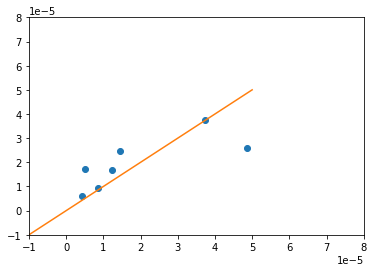

In [5]:
# check if the uncertainties are roughly symmetric
df["uperr"] = df.Prot_d_84 - df.Prot_d_50
df["lowerr"] = df.Prot_d_50 - df.Prot_d_16
plt.scatter(df.uperr,df.lowerr)
plt.plot([-1e-5,5e-5],[-1e-5,5e-5])
plt.xlim(-1e-5,8e-5)
plt.ylim(-1e-5,8e-5)

In [6]:
# use mean value for uncertainty estimate
result = pd.DataFrame({"ID":df.ID,
                        'Prot_d':df.Prot_d_50,
                       'e_Prot_d':(df.uperr + df.lowerr)/2})
result

,ID,Prot_d,e_Prot_d
0,44984200,0.112988,0.000011
1,44984200,0.112973,0.000009
2,44984200,0.112984,0.000005
3,237880881,0.351673,0.000020
4,237880881,0.351306,0.000037
5,277539431,0.190013,0.000014
6,452922110,0.176417,0.000037


In [7]:
resprop = pd.DataFrame([result.groupby("ID").Prot_d.mean(),
                        result.groupby("ID").e_Prot_d.apply(lambda x: np.sqrt((x**2).sum()) / len(x))]
                       ).T

In [8]:
resprop.to_csv(f"{CWD}/analysis/results/mcmc/rotation/mcmc_rotation_output_propagated.csv")